In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
W=1000
b=0
X_train=df["LotArea"]
Y_train=df["SalePrice"]
Y_train.min()

34900

In [4]:
def linear_Model(X_train,W,b):
    return X_train*W+b


In [5]:
def Compute_Cost(X_train,Y_train,W,b):
    m=X_train.shape[0]
#     Error=0
#     for i in range(m):
#         Error+=(Y_train[i]-linear_Model(X_train[i],W,b))**2
#     return Error/(2*m)
        
    return (1/(2*m))*np.sum((Y_train-linear_Model(X_train,W,b))**2)


In [6]:
def gradient(X_train,Y_train,W,b):
    m=X_train.shape[0]
#     dj_dw,dj_db=0,0

#     for i in range(m):
#         dj_dw+=(Y_train[i]-linear_Model(X_train[i],W,b))*X_train[i]*(-1)
#         dj_db+=(Y_train[i]-linear_Model(X_train[i],W,b))*(-1)
#     return dj_dw/m,dj_db/m
    dj_db=(1/m)*np.sum((Y_train-linear_Model(X_train,W,b))*(-1))
    dj_dw=(1/m)*np.sum(np.dot(Y_train-linear_Model(X_train,W,b),X_train)*(-1))
    return dj_dw,dj_db

In [7]:
# W=1
# b=10
# X_train=np.array([1,2,3,4,5,6,7,8,9])
# Y_train=np.array([12,14,15,17,18,21,27,29,30])

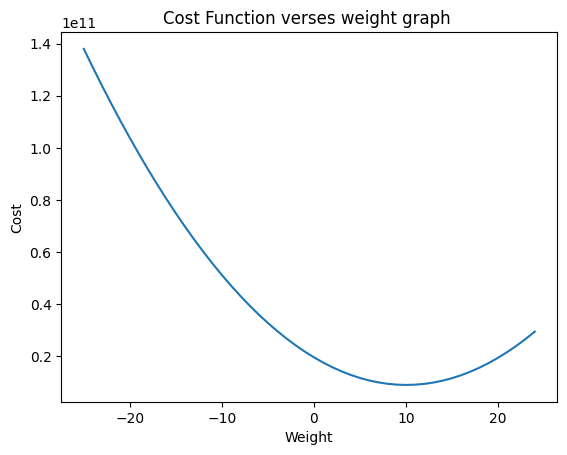

In [8]:
def plot_Cost_W(X_train,Y_train,b,W_list=np.arange(-25,25)):

    cost_list=[]
    for i in range(len(W_list)):
        cost_list.append(Compute_Cost(X_train,Y_train,W_list[i],b))
    plt.plot(W_list,cost_list)
    plt.title("Cost Function verses weight graph ")
    plt.xlabel("Weight")
    plt.ylabel("Cost")
    plt.show()

plot_Cost_W(X_train,Y_train,b)

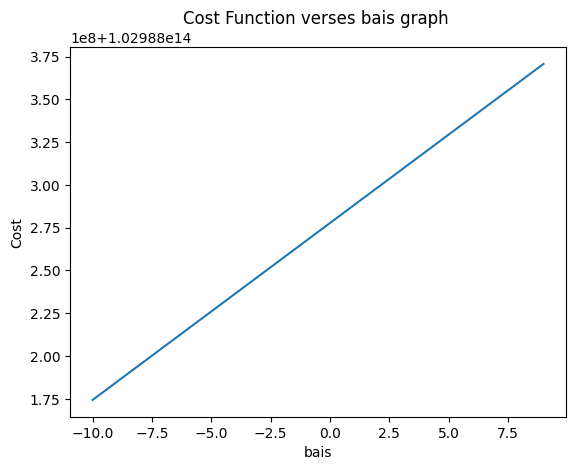

In [9]:
def plot_Cost_B(X_train,Y_train,W,B_list=np.arange(-10,10)):

    cost_list=[]
    for i in range(len(B_list)):
        cost_list.append(Compute_Cost(X_train,Y_train,W,B_list[i]))
    plt.plot(B_list,cost_list)
    plt.title("Cost Function verses bais graph ")
    plt.xlabel("bais")
    plt.ylabel("Cost")
    plt.show()
plot_Cost_B(X_train,Y_train,W)

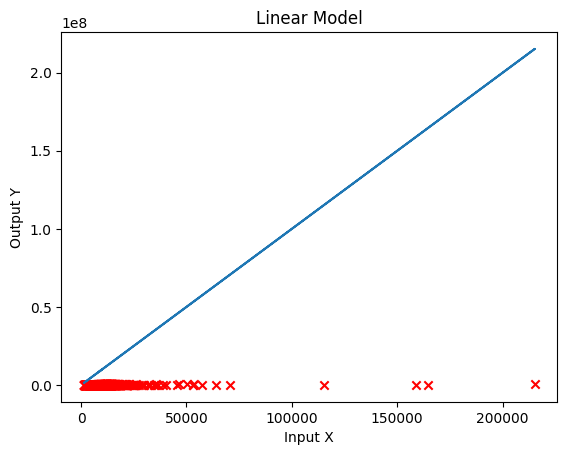

In [10]:
def plot_Linear(X_train,Y_train,W,b):      
    plt.scatter(X_train,Y_train,marker='x', c='r')
    plt.plot(X_train,linear_Model(X_train,W,b))
    plt.title("Linear Model")
    plt.xlabel("Input X")
    plt.ylabel("Output Y")
    plt.show()
plot_Linear(X_train,Y_train,W,b)

The Cost funtion will equal  64252125932770.21
the W  have reached equal  791.9506990739034
the cost function is decrease


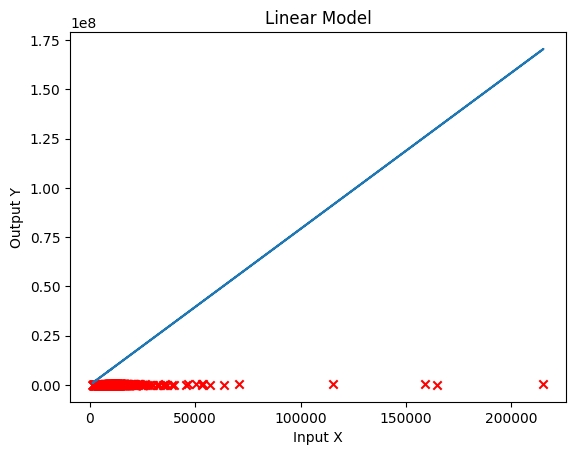

The Cost funtion will equal  8909591056.343473
the W  have reached equal  10.048409355822749
the cost function is decrease


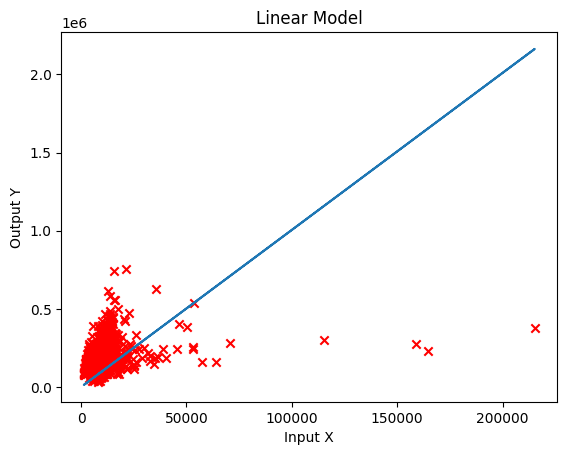

The Cost funtion will equal  8909585394.720251
the W  have reached equal  10.04840559049354
the cost function is decrease


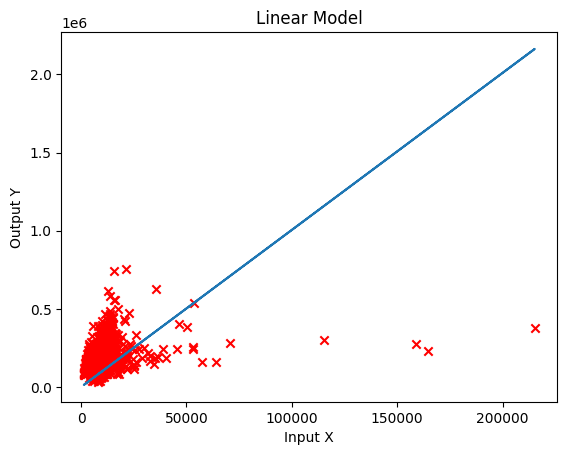

The Cost funtion will equal  8909579733.102392
the W  have reached equal  10.048401825166112
the cost function is decrease


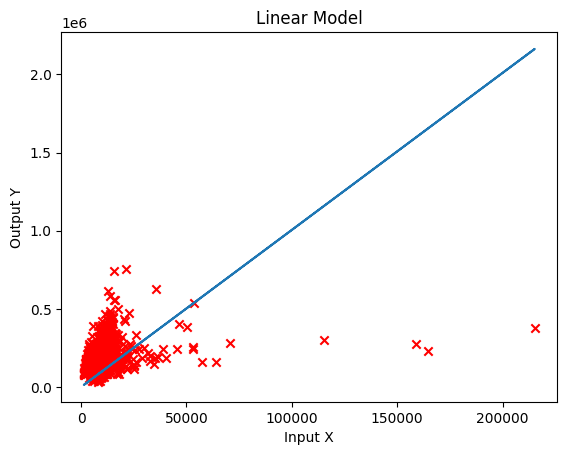

The Cost funtion will equal  8909574071.489897
the W  have reached equal  10.048398059840467
the cost function is decrease


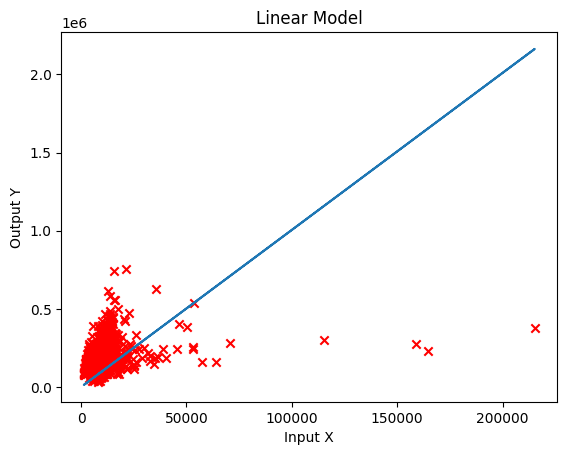

The Cost funtion will equal  8909568409.882765
the W  have reached equal  10.048394294516608
the cost function is decrease


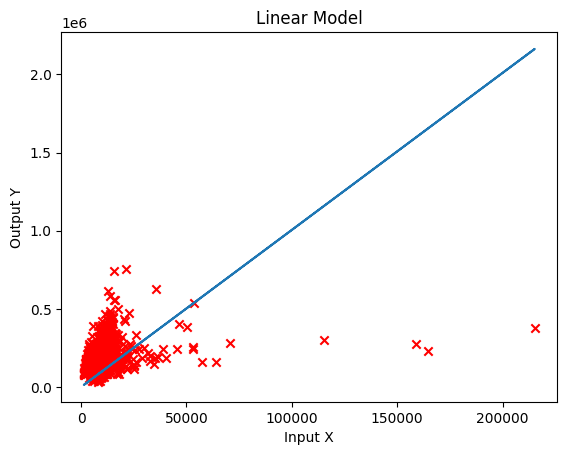

The Cost funtion will equal  8909562748.281
the W  have reached equal  10.048390529194533
the cost function is decrease


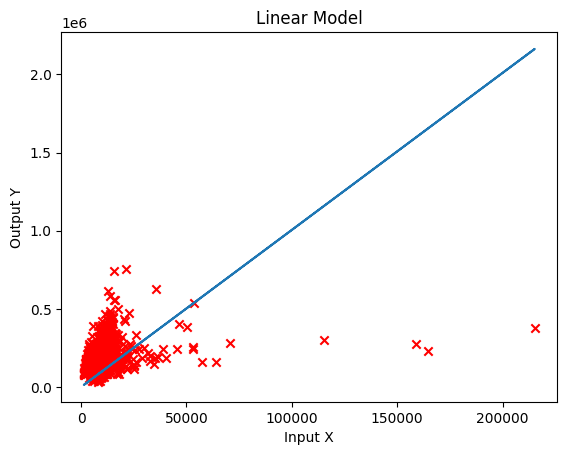

The Cost funtion will equal  8909557086.684597
the W  have reached equal  10.048386763874241
the cost function is decrease


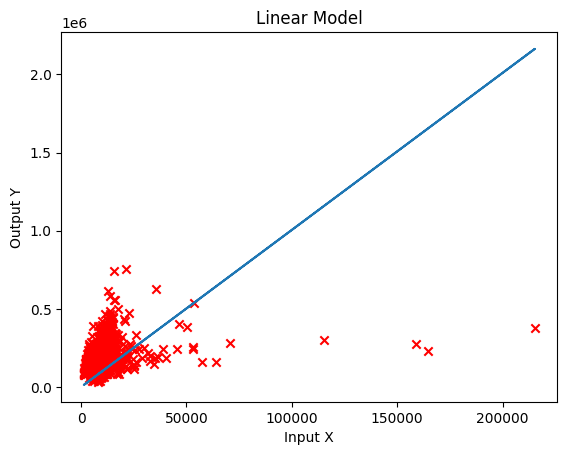

The Cost funtion will equal  8909551425.093557
the W  have reached equal  10.048382998555732
the cost function is decrease


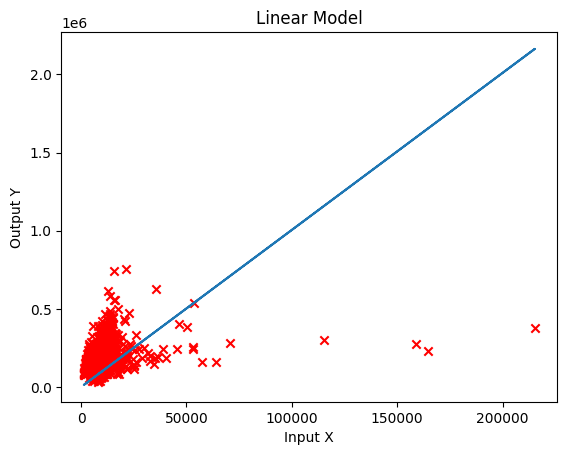

The Cost funtion will equal  8909545763.507885
the W  have reached equal  10.048379233239007
the cost function is decrease


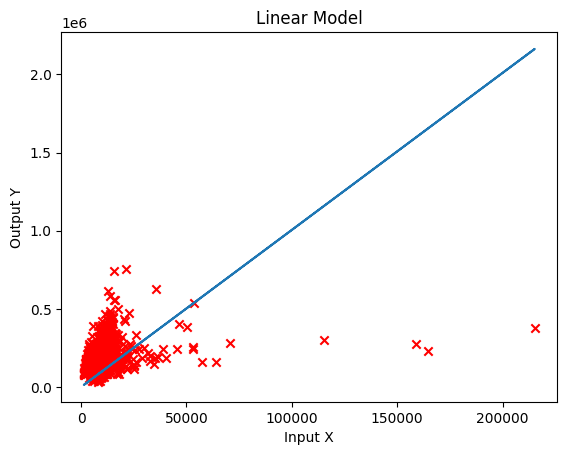

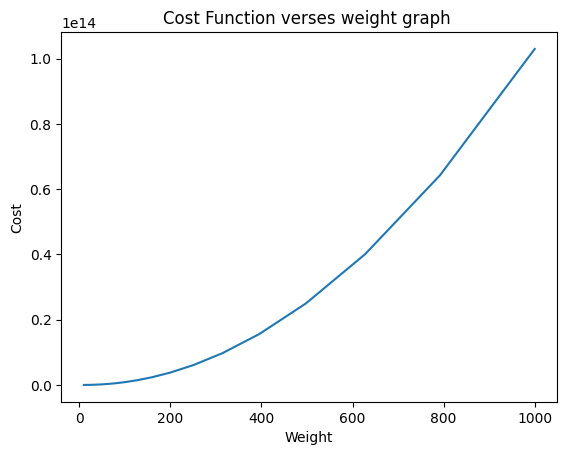

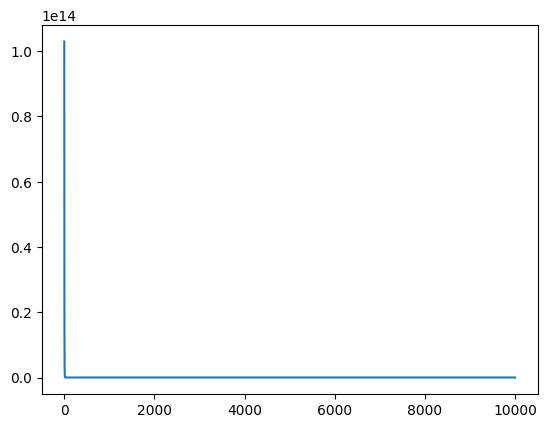

In [11]:

def gradient_desent(X_train,Y_train,W,b,Alpha=0.1,iterations=1000):
    cost_list=[Compute_Cost(X_train,Y_train,W,b)]
    W_list=[W]
    j=0
    for i in range(iterations):
        
        dj_dw,dj_db=gradient(X_train,Y_train,W,b)
        
        W-=Alpha*dj_dw
        b-=Alpha*dj_db
        cost_list.append(Compute_Cost(X_train,Y_train,W,b))
        W_list.append(W)
        
        if (i%(iterations/10)==0):
            j+=1
            print("The Cost funtion will equal ",Compute_Cost(X_train,Y_train,W,b))
            print("the W  have reached equal ",W)
            
            if (cost_list[j]<cost_list[j-1]):
                print("the cost function is decrease")
            else:
                print("the cost function is increase ya 5ayb")
            plot_Linear(X_train,Y_train,W,b)
    
    plot_Cost_W(X_train,Y_train,b,W_list)
    plt.plot(np.arange(iterations),cost_list[:iterations])

gradient_desent(X_train,Y_train,W,b,Alpha=0.000000001,iterations=10000)

